# NBA Player Statistics
Edwin Dely

June 5, 2018

## Background

The topic of my project is the statistics of every NBA player in the 2017-2018 season. I hope to know understand what attributes that the player brings to their specific teams. The source of the datasheet comes from MySportsFeeds. The information in the datasheet includes the weight, height, name, age, games played, and shot attempts/makes.

## Data

Intersted in a relationship between variables which are age and 2 pt field goals made. 


In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("nba_player_stats_2017_18.csv")
df.loc[:,["Age","Fg2PtMade"]]

df_sub = df[df["Age"] > 0]
df_sub.head()

,Player_ID,LastName,FirstName,Jersey_Num,Position,Height,Weight,Birth_Date,Age,Birth_City,...,Team_Abbr.,Team_City,Team_Name,GamesPlayed,Fg2PtAtt,Fg2PtMade,Fg3PtAtt,Fg3PtMade,FtAtt,FtMade
0,10138,Abrines,Alex,8.0,SG,"6'6""",190.0,8/1/93,24,Palma de Mallorca,...,OKL,Oklahoma City,Thunder,75,70,31,221,84,46,39
1,9466,Acy,Quincy,13.0,PF,"6'7""",240.0,10/6/90,27,"Tyler, TX",...,BRO,Brooklyn,Nets,70,73,28,292,102,60,49
2,9390,Adams,Steven,12.0,C,"7'0""",255.0,7/20/93,24,Rotorua,...,OKL,Oklahoma City,Thunder,76,710,448,2,0,287,160
3,13742,Adebayo,Bam,13.0,C,"6'10""",255.0,7/18/97,20,"Newark, NJ",...,MIA,Miami,Heat,69,333,174,7,0,179,129
4,9375,Afflalo,Arron,4.0,SG,"6'5""",210.0,10/15/85,32,"Los Angeles, CA",...,ORL,Orlando,Magic,52,92,38,70,27,26,22


In [58]:
Age=df['Age']
print('Age stats')
a=np.min(Age)
print('min=',a)
b=np.max(Age)
print('max=',b)
c=np.mean(Age)
print('mean=', c)
d=np.std(Age)
print('standard deviation=', d)

print('Fg2PtMade stats')
fg=df['Fg2PtMade']
e=np.min(fg)
print('min=',e)
f=np.max(fg)
print('max=',f)
g=np.mean(fg)
print('mean=', g)
h=np.std(fg)
print('standard deviation=', h)

print('FtMade stats')
ft=df['FtMade']
i=np.min(ft)
print('min=',i)
j=np.max(ft)
print('max=',j)
k=np.mean(ft)
print('mean=', k)
l=np.std(ft)
print('standard deviation=', l)

Age stats
min= 0
max= 41
mean= 24.65909090909091
standard deviation= 7.854026295072076
Fg2PtMade stats
min= 0
max= 725
mean= 116.27759740259741
standard deviation= 135.5555400313413
FtMade stats
min= 0
max= 624
mean= 66.40097402597402
standard deviation= 88.25010539907248


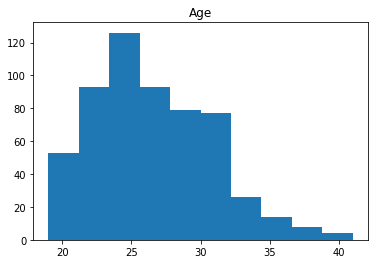

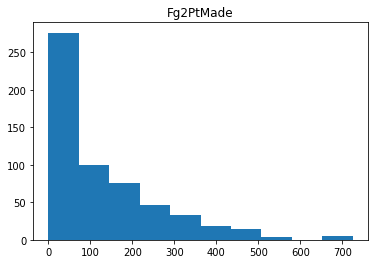

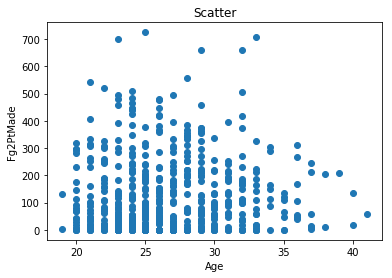

In [54]:
import matplotlib as mpl
import matplotlib.pyplot as plt

age = df_sub["Age"]
age.head()

fig1 = plt.figure()
plt.hist(age)
plt.title("Age")
plt.show()
fig1.savefig('Age.png')

fg = df_sub["Fg2PtMade"]
fg.head()

fig2 = plt.figure()
plt.hist(fg)
plt.title("Fg2PtMade")
plt.show()
fig2.savefig('fg.png')

fig3 = plt.figure()
plt.scatter(age, fg)
plt.title("Scatter")
plt.xlabel("Age")
plt.ylabel("Fg2PtMade")
plt.show()
fig3.savefig('Scat.png')

## Analysis

Among all the NBA players, they are more free throws made than 2 pointers made.

In [75]:
FT = df['FtMade']
print("Observation FT:", sum(FT))

FG = df['Fg2PtMade']
print("Observation FG:", sum(FG))

Observation FT: 40903
Observation FG: 71627


In [78]:
import matplotlib.axes as ax
import matplotlib.pyplot as plt
%matplotlib inline

sd_fg = np.sqrt(h)
n_fg = 40903
p_fg = np.random.normal(loc=g, scale=h, size=n_fg)
print("Field Goals Made")
print("Observation:", len(p_fg))
print("Mean:", g)
print("Standard Deviation:", sd_fg)
print("Variance:", np.std(p_fg)**2)

sd_ft = np.sqrt(l)
n_ft = 71627
p_ft = np.random.normal(loc=k, scale=l, size=n_ft)
print("Free Throws Made")
print("Observation:", len(p_ft))
print("Mean:", k)
print("Standard Deviation:", l)
print("Variance:", np.std(p_ft)**2)

Field Goals Made
Observation: 40903
Mean: 116.27759740259741
Standard Deviation: 11.64283213102986
Variance: 18197.63136334225
Free Throws Made
Observation: 71627
Mean: 66.40097402597402
Standard Deviation: 88.25010539907248
Variance: 7733.407705359915


Sample Difference: 49.876623376623385
Expected Population Differnence: 0
Standard Error: 0.74697528463739
z-score: 66.77145067903469


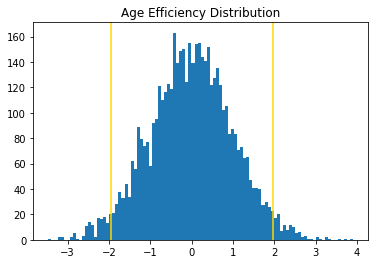

In [79]:
obs_diff = g-k

exp_diff = 0
vnfg = (h**2)/n_fg
vnft = (l**2)/n_ft
std_err = np.sqrt(vnfg + vnft)

print("Sample Difference:", obs_diff)
print("Expected Population Differnence:", exp_diff)
print("Standard Error:", std_err)

z=(obs_diff - exp_diff)/std_err
print("z-score:", z)

stdn_data = np.random.randn(5000)

stdn = plt.figure()
plt.hist(stdn_data, bins=100)
plt.axvline(x=-1.96, color='gold')
plt.axvline(x=1.96, color='gold')
plt.title("Made Shots")
plt.show()
stdn.savefig("Age_Efficiency.png")

#Rejected the null hypothesis

In [42]:
import statsmodels.formula.api as smf

nba = pd.read_csv("nba_player_stats_2017_18.csv")
nba.head()

,Player_ID,LastName,FirstName,Jersey_Num,Position,Height,Weight,Birth_Date,Age,Birth_City,...,Team_Abbr.,Team_City,Team_Name,GamesPlayed,Fg2PtAtt,Fg2PtMade,Fg3PtAtt,Fg3PtMade,FtAtt,FtMade
0,10138,Abrines,Alex,8.0,SG,"6'6""",190.0,8/1/93,24,Palma de Mallorca,...,OKL,Oklahoma City,Thunder,75,70,31,221,84,46,39
1,9466,Acy,Quincy,13.0,PF,"6'7""",240.0,10/6/90,27,"Tyler, TX",...,BRO,Brooklyn,Nets,70,73,28,292,102,60,49
2,9390,Adams,Steven,12.0,C,"7'0""",255.0,7/20/93,24,Rotorua,...,OKL,Oklahoma City,Thunder,76,710,448,2,0,287,160
3,13742,Adebayo,Bam,13.0,C,"6'10""",255.0,7/18/97,20,"Newark, NJ",...,MIA,Miami,Heat,69,333,174,7,0,179,129
4,9375,Afflalo,Arron,4.0,SG,"6'5""",210.0,10/15/85,32,"Los Angeles, CA",...,ORL,Orlando,Magic,52,92,38,70,27,26,22


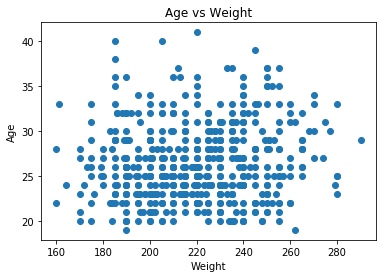

In [98]:
df_sub = df[df["Age"] > 0 & (df['Weight']>0)]
#age = df_sub["Age"]
#age.head()

#weight = df_sub["Weight"]
#weight.head()

inc_edu = plt.figure()
plt.scatter(df_sub["Weight"], df_sub["Age"])
plt.title('Age vs Weight')
plt.xlabel('Weight')
plt.ylabel("Age")
plt.show()

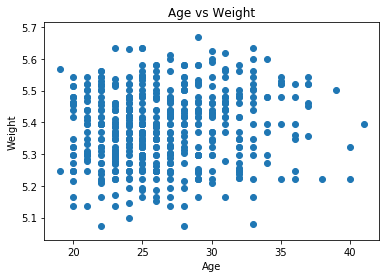

In [95]:
df_sub['Weight'].head()

ln_inc_edu = plt.figure()
plt.scatter(df_sub['Age'], np.log(df_sub['Weight']))
np.log(df_sub['Weight']).head()
plt.title("Age vs Weight")
plt.xlabel("Age")
plt.ylabel("Weight")
plt.show()

In [97]:
model = smf.ols(formula="np.log(Weight) ~ Age",data=df_sub)
est = model.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Weight)   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     4.670
Date:                Thu, 07 Jun 2018   Prob (F-statistic):             0.0311
Time:                        10:45:29   Log-Likelihood:                 405.00
No. Observations:                 537   AIC:                            -806.0
Df Residuals:                     535   BIC:                            -797.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3177      0.031    168.974      0.000       5.256       5.379
Age            0.0025      0.001      2.161      0.031       0.000       0.005
==============================================================================
Omnibus:                       12.862   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                8.103
Skew:                          -0.144   Prob(JB):                       0.0174
Kurtosis:                       2.472   Cond. No.                         172.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Conclusion

Based on the Hypothesis test that rejected the null statement, among the players there are more 2 pointers made than there are free throws. But on the correlation between age and field goals made, it looked like as the older the player was the less shot they made. The linear regression that compared age & weight had no correlation with each known that the r squared was a low value. The most challenging part of the data set was trying to get rid of all the zeros that were entered in the weight and age category.